<a href="https://colab.research.google.com/github/Keeming99/Visualisation/blob/main/Games_Sales_Data_Visualisation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import libraries
import pandas as pd
import numpy as np


import scipy.stats as st
%matplotlib inline
## All columns will be displayed when you print or view the DataFrame.
pd.set_option('display.max_columns',None)


Data Source


*   This dataset is available on Kaggle.
*   contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

*  The fields include Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales.
*   It is based on BeautifulSoup using Python.

*   The dataset has a total of 16,598 observations with 11 attributes.







In [3]:
import math
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import StandardScaler
# Scaling of features, the average value of each feature (column) in the data set is zero, converts the standard deviation to one.

# This operation is useful when properties have different scales or units.

# Scaling is important for many machine learning algorithms. The characteristics have a similar scale,helps the algorithm

# to work properly and to balance being affected by one feature over others.

In [4]:
#Load Dataset

#to mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#set path of datasets
df = pd.read_csv('/content/drive/MyDrive/Dataset folder/vgsales.csv')

df.head()
#We saw all the columns that we could not see on the site with the code we wrote

Mounted at /content/drive


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Check number of rows
num_rows = len(df)

#number of columns
num_columns = len(df.columns)

print('Number of observations (including headers): ', num_rows)
print('Number of attributes: ', num_columns)
# There are 11 columns, 16598 rows, it's quite long so we called a standardscaler

Number of observations (including headers):  16598
Number of attributes:  11


The number of observations and attributes match those as listed from the Kaggle website. As a first step, this information helps in verifying the dataset is as stated above.

In [7]:
#Unique values for each attribute
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

for column, values in unique_values.items():
    print(f"Unique values: '{column}':")
    print(values)
    print()

Unique values: 'Rank':
[    1     2     3 ... 16598 16599 16600]

Unique values: 'Name':
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']

Unique values: 'Platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Unique values: 'Year':
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]

Unique values: 'Genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

Unique values: 'Publisher':
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda So

In [8]:
#Total number of unique value for each attribute
unique_counts = df.nunique()

#print
for attribute, count in unique_counts.items():
    print(f"{attribute} : {count}")

Rank : 16598
Name : 11493
Platform : 31
Year : 39
Genre : 12
Publisher : 578
NA_Sales : 409
EU_Sales : 305
JP_Sales : 244
Other_Sales : 157
Global_Sales : 623


In [6]:
#other_sales refers to regions other than the regions described, while global_sales refers to the total amount of sales the game has achieved globally
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#there are mostly missing data in 2015 and later, let's remove them
drop_row_index = df[df['Year']>2015].index
df = df.drop(drop_row_index)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
#As we can see, the number of lines decreased from 16598 to 16250.
df.shape

(16250, 11)

In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
#Descriptive statistics (all 11 attributes)
pd.set_option('display.max_columns',None)
df.describe(include="all")
#Year column started from 1980 and gone until 2015

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,16250,16250,15979.000000,16250,16194,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
unique,NaN,11296,31,NaN,12,566,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2162,NaN,3196,1331,NaN,NaN,NaN,NaN,NaN
mean,8233.153785,NaN,NaN,2006.197071,NaN,NaN,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,NaN,NaN,5.714810,NaN,NaN,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


To identify the unique values' number and the descriptive statistics for each attribute helps in not just having a better understanding of the datasets but also checking them for possible outliers.

In [15]:
df.describe()
#Year column started from 1980 and gone until 2015

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
df.describe(include=["object","bool"])
# Here we show data of type object and bool
# The so called count returns the number of non-null values of the column
# unique gives the number of unique data here we see the types
# top shows the most common value
# freq shows the value of the most frequently found values.

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [45]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [46]:
df['Genre'].value_counts()
# we print the number of genre on the screen here too
# we saw the number of species

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

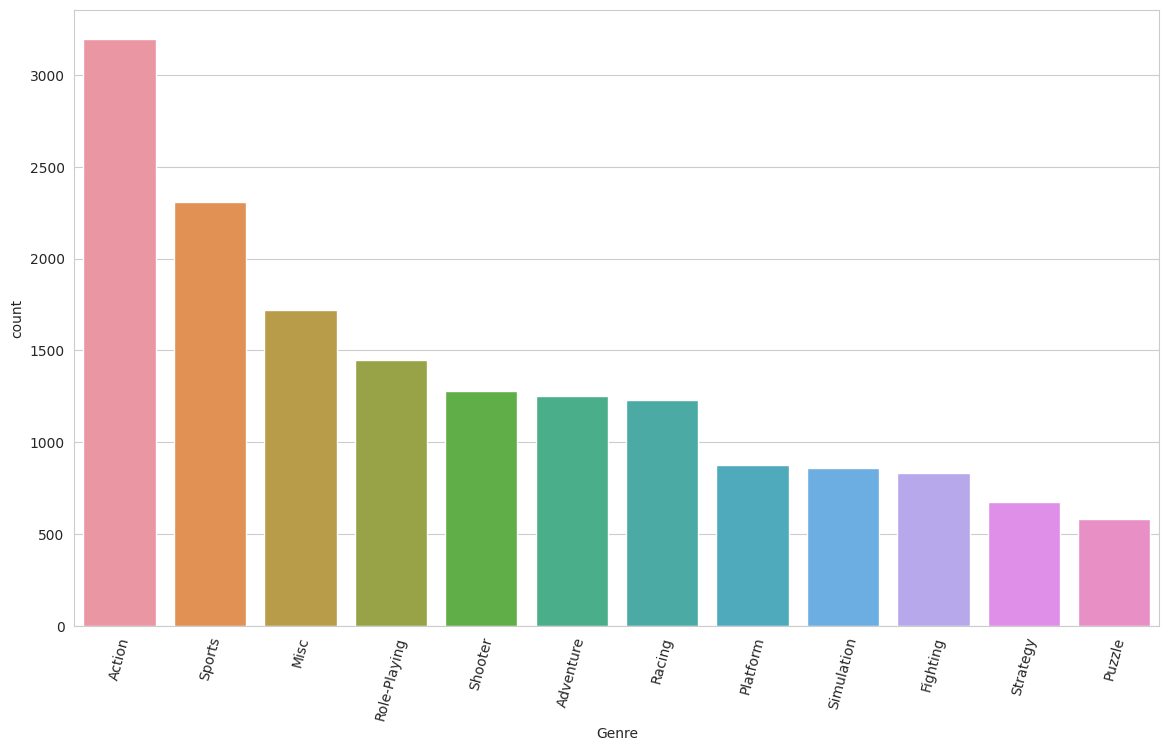

In [51]:
#Now let's see who sells the most
plt.figure(figsize=(14,8))
sns.countplot(x = "Genre",data = df ,order = df["Genre"].value_counts().index)
plt.xticks(rotation=75)
#We create a counting chart.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

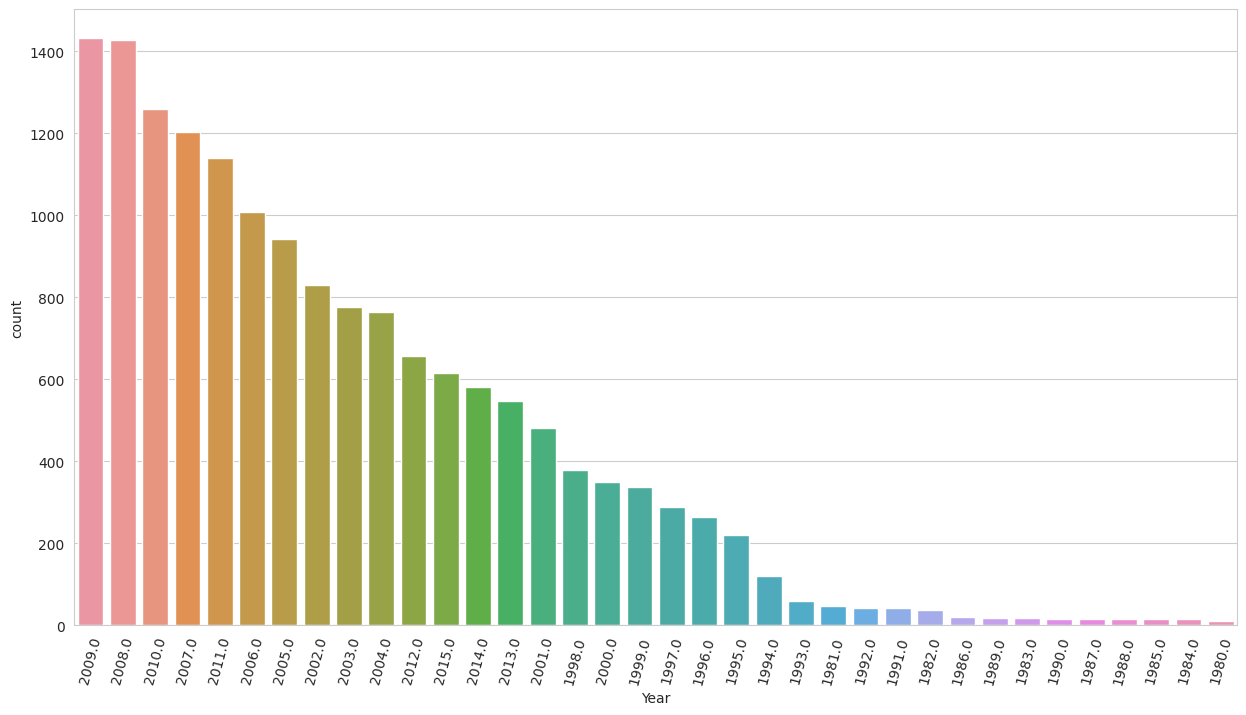

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(x = "Year", data = df, order = df.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index)
#This code is used to count the games in the dataset by years and sort those numbers by years.
plt.xticks(rotation=75)
#We create a counting chart.

<Axes: xlabel='Year', ylabel='count'>

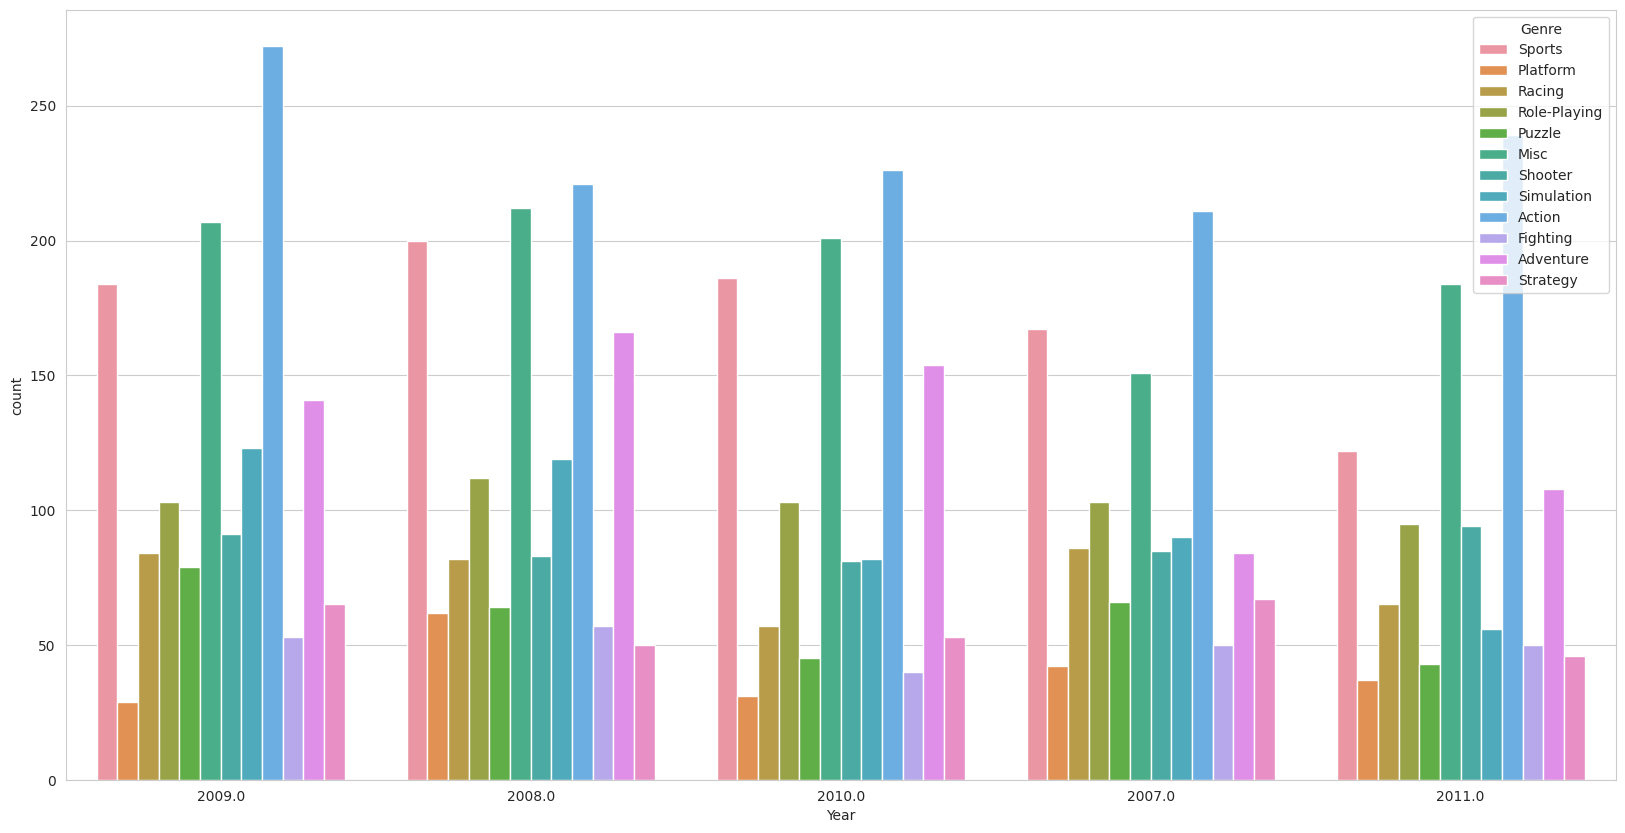

In [54]:
#Let's see the 5 years with the most games on the basis of genre
plt.figure(figsize=(20,10))
#take 'Genre' column as colour encoding
sns.countplot(x = "Year",data = df, hue = "Genre", order = df.Year.value_counts().iloc[:5].index)
#We looked at when the games were released according to the game types.
#most was 2009

In [36]:
#Now let's determine which year has the highest sales values worldwide using the global sales column.
df_year = df.groupby(by=["Year"])["Global_Sales"].sum()
#First we wrote "Year" and then we wrote it according to whichever way we were going to do it.
df_year = df_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

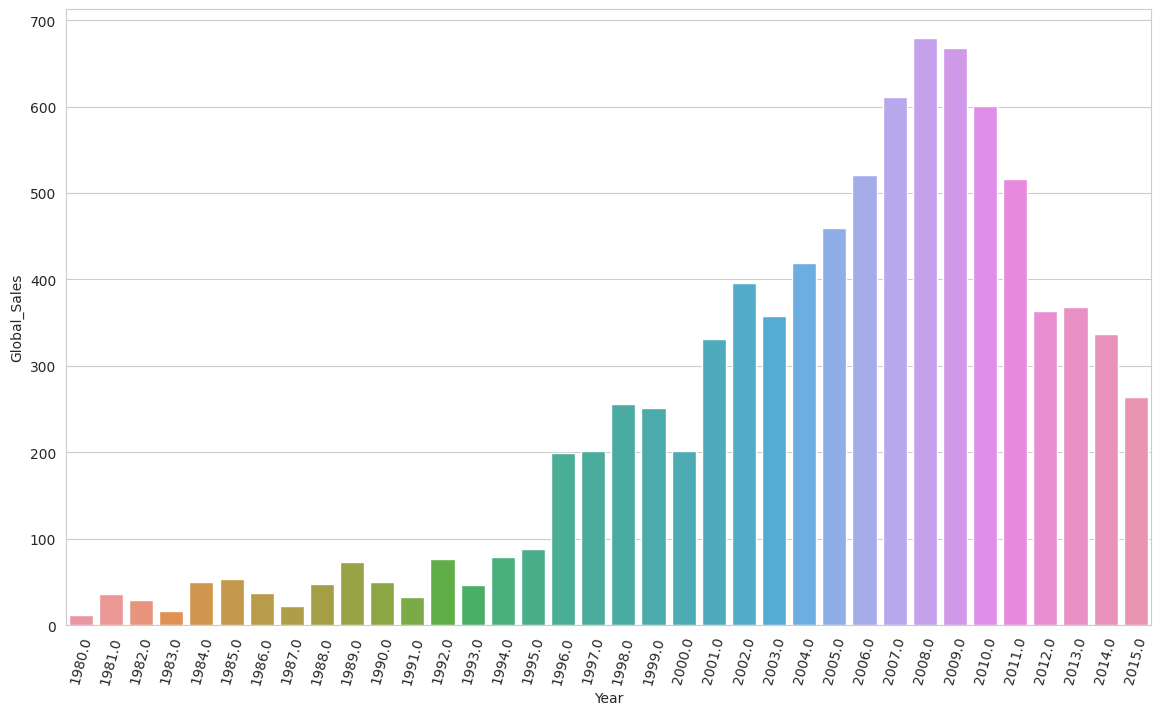

In [37]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Year', y = 'Global_Sales', data = df_year)
plt.xticks(rotation = 75)
#if we have x and y values then we can't use countplot we can use barplot!!

In [32]:
#Let's determine which game genre is published the most in a year.
#For this, let's group by year and type columns
year_max_df = df.groupby(by = ['Year', 'Genre']).size().reset_index(name = 'count')

# grouped the year and genre datasets, we will use the highest value to find
# checked the size with size, then we created a data frame called count
year_max_index = year_max_df.groupby(["Year"])["count"].transform(max)==year_max_df["count"] # marked the rows with max
year_max_genre = year_max_df[year_max_index].reset_index(drop = True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep="last").reset_index(drop = True)
year_max_genre
# with this code, can get a data frame with the highest number of types of each year

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3
5,1985.0,Puzzle,4
6,1986.0,Platform,6
7,1987.0,Sports,4
8,1988.0,Platform,4
9,1989.0,Puzzle,5


In [34]:
genre = year_max_genre["Genre"].values

In [35]:
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

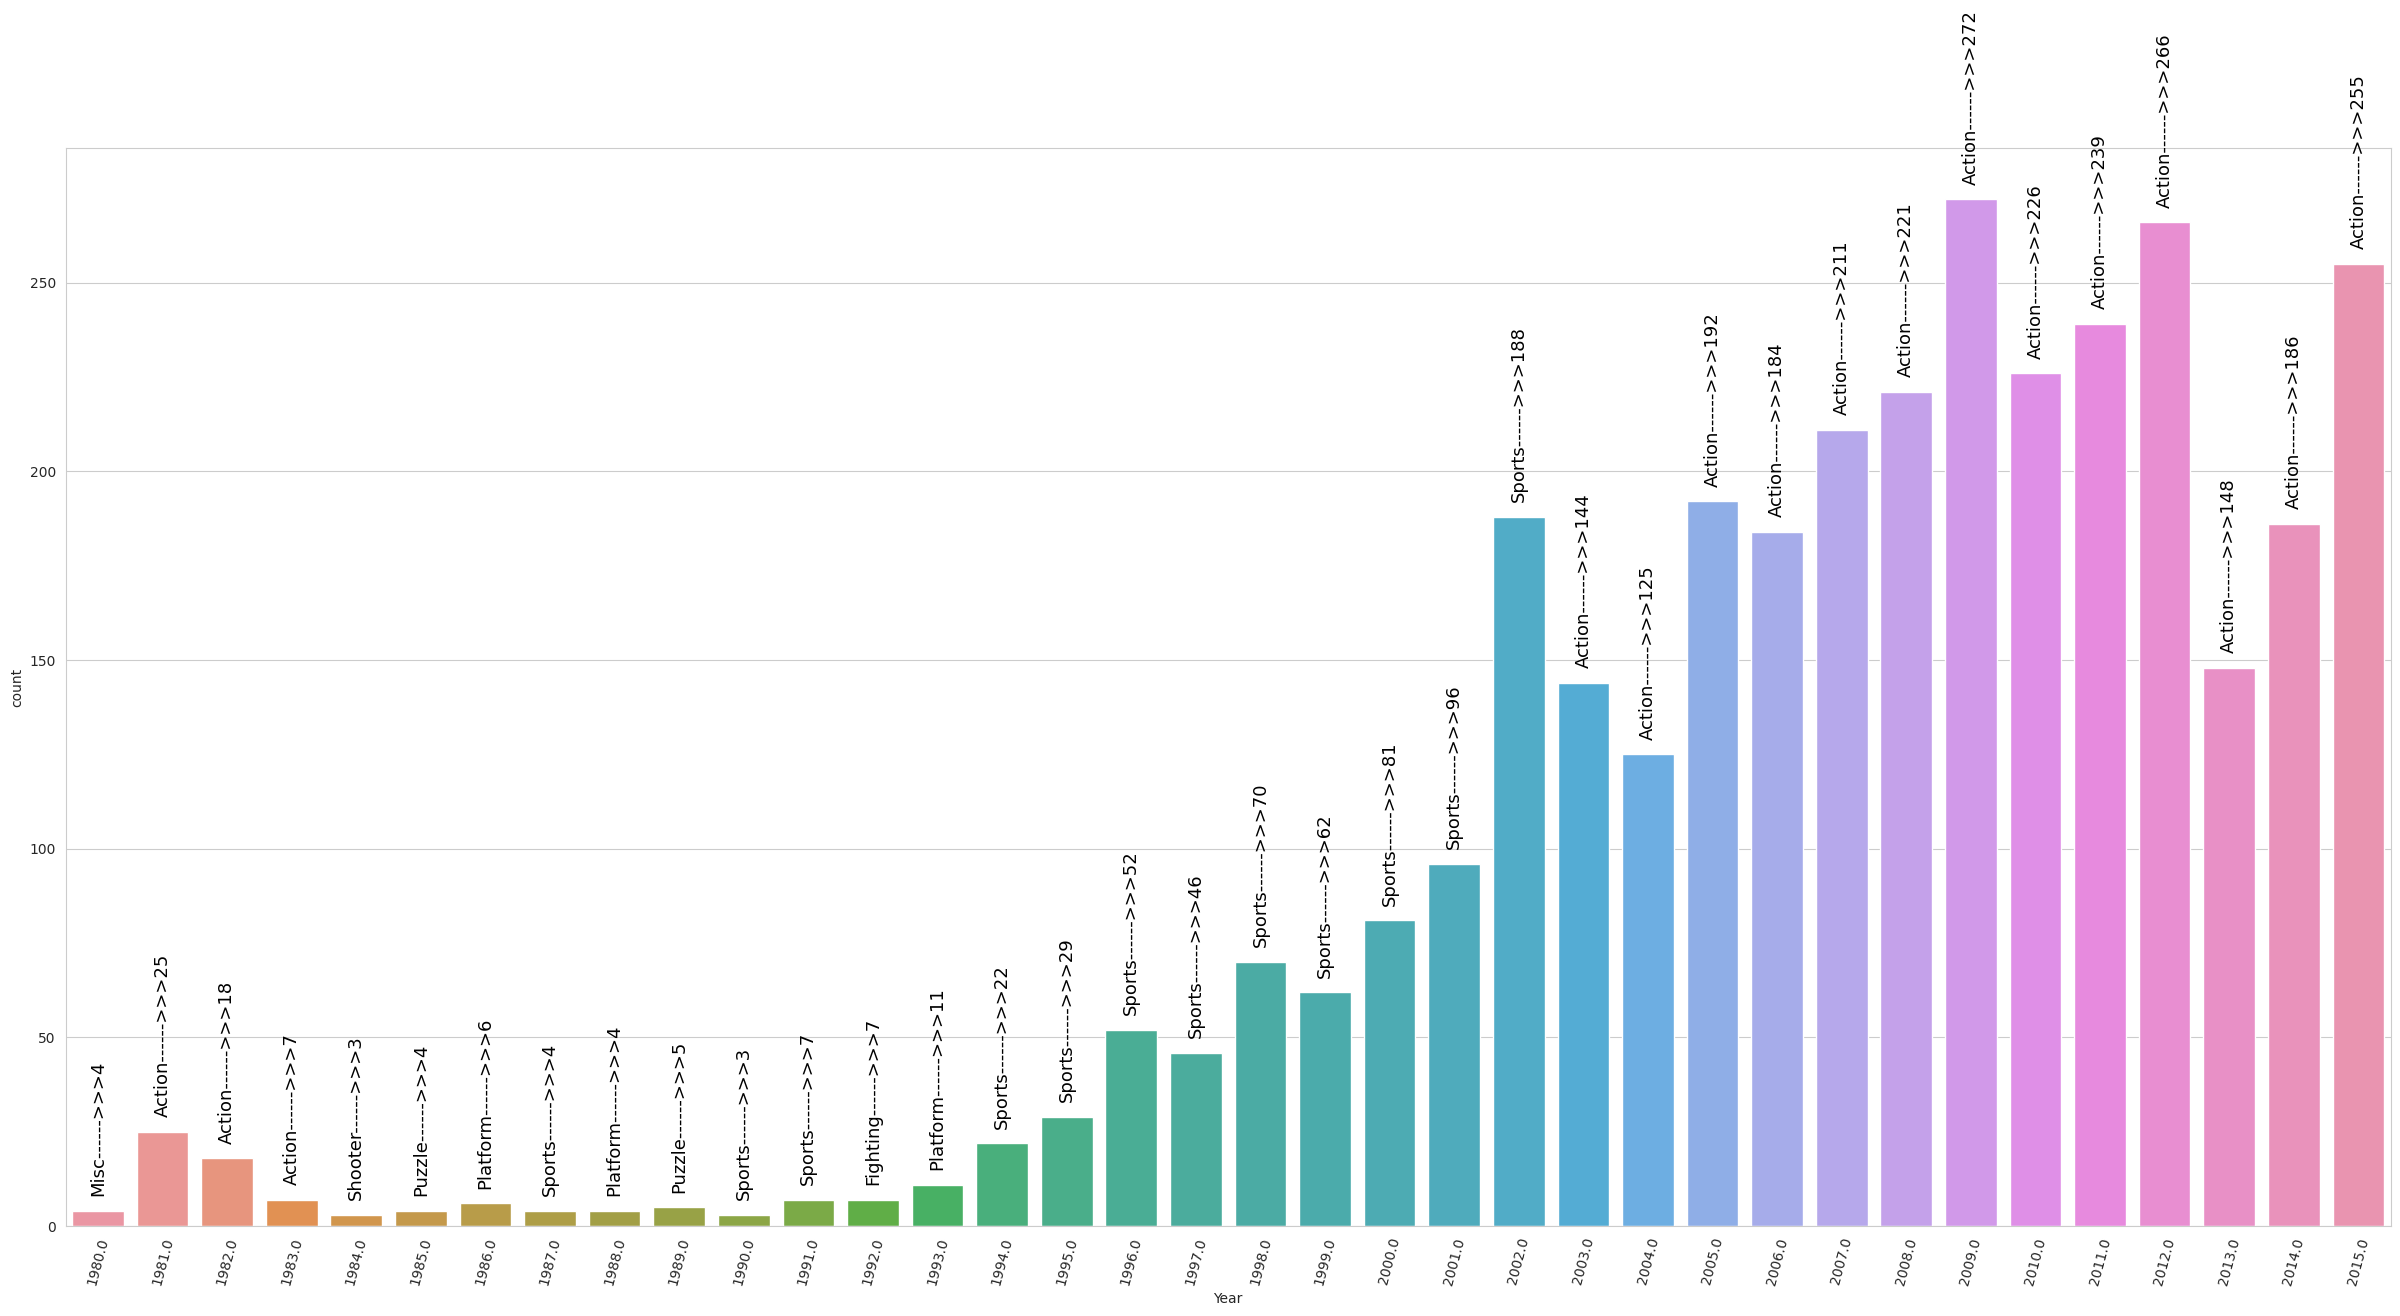

In [36]:
plt.figure(figsize = (30,14)) # set the size for figure
graph = sns.barplot(x = 'Year',  y = 'count', data = year_max_genre) # plot a bar chart using seaborn library's barplot
index = 0
for value in year_max_genre['count']: # to have the relevant type and number printed on each bar
  graph.text(index, value+5, str(genre[index]+ "------>>>"+str(value)), color = 'Black', size = 13, rotation = 90, ha = "center")
    #We did the writing operations with g.text
     #The variable value expresses its type
  index += 1
plt.xticks(rotation = 75)
# to visualize the data and to be more detailed
# it can be seen which game genre has been released the most in 1 year!

In [56]:
# Let's see which is the best selling game genre in 1 year
# Will transfer the sales quantities
year_sale_df = df.groupby(by=['Year','Genre'])['Global_Sales'].sum().reset_index() # group the genre datasets with year

# calculates the total amount of global sales with global_sales in each year and assigns it to the new variable
year_sale = year_sale_df.groupby(by=['Year'])['Global_Sales'].transform(max)==year_sale_df['Global_Sales']  # highest each year
# identifiy the types with global sales volume, and using groupby and tranform transactions, we can use the max.
# mark the lines that are equal to the sales amount.
year_sale_max = year_sale_df[year_sale].reset_index(drop = True)
# select the rows containing the types with the highest global sales volume and assign them to a new dataframe

In [57]:
genre = year_sale_max['Genre']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

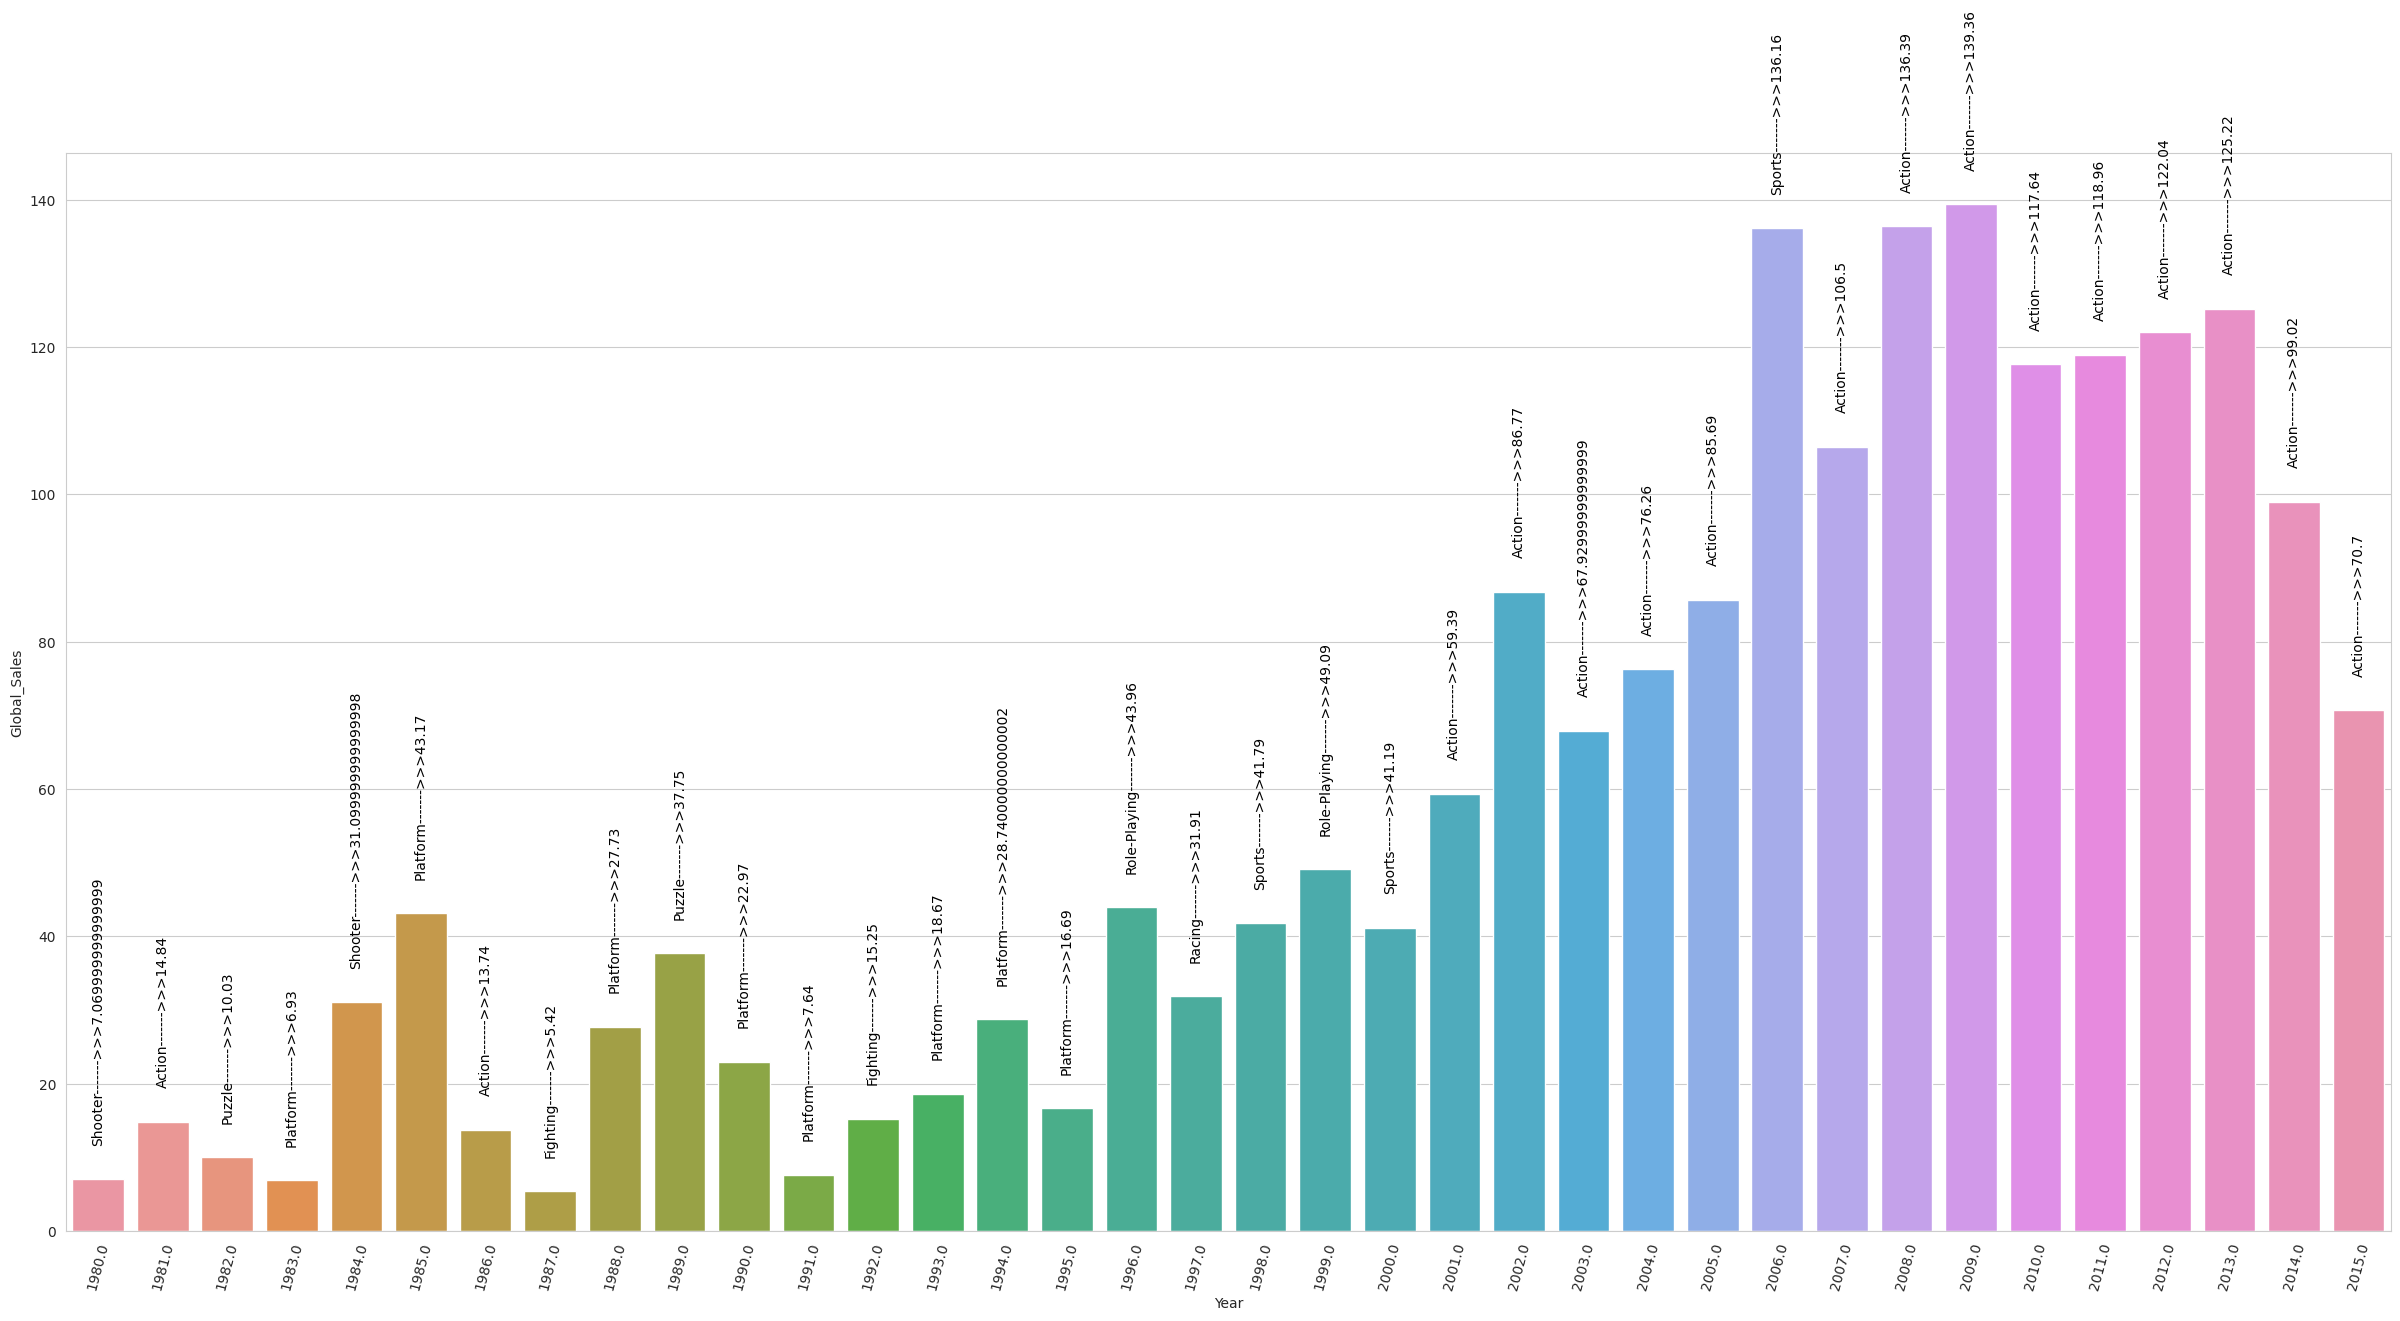

In [58]:
plt.figure(figsize=(30,14))
graph = sns.barplot(x = 'Year', y = 'Global_Sales', data = year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
  graph.text(index, value+5, str(genre[index]+"------->>>"+ str(value)),color = 'Black', ha = 'center', rotation = 90)
  index += 1
plt.xticks(rotation = 75)


In [33]:
# Let's take a look at the game genre with the highest selling price globally.
df_genre = df.groupby(['Genre'])["Global_Sales"].sum() #by the type column of the dataset and the total global of each type
# Use it to calculate according to the amount of sales, we have grouped and collected according to genre
df_genre = df_genre.reset_index() # converted the generated data to data frame and fixed the image
df_genre = df_genre.sort_values(by = ['Global_Sales'], ascending = False)
df_genre
# sorted the dataframe and made it from largest to smallest
# Sorting with sort_values be careful

,Genre,Global_Sales
0,Action,1731.26
10,Sports,1316.33
8,Shooter,1019.15
7,Role-Playing,920.57
4,Platform,829.30
3,Misc,808.79
6,Racing,730.40
2,Fighting,445.05
9,Simulation,391.52
5,Puzzle,244.95


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

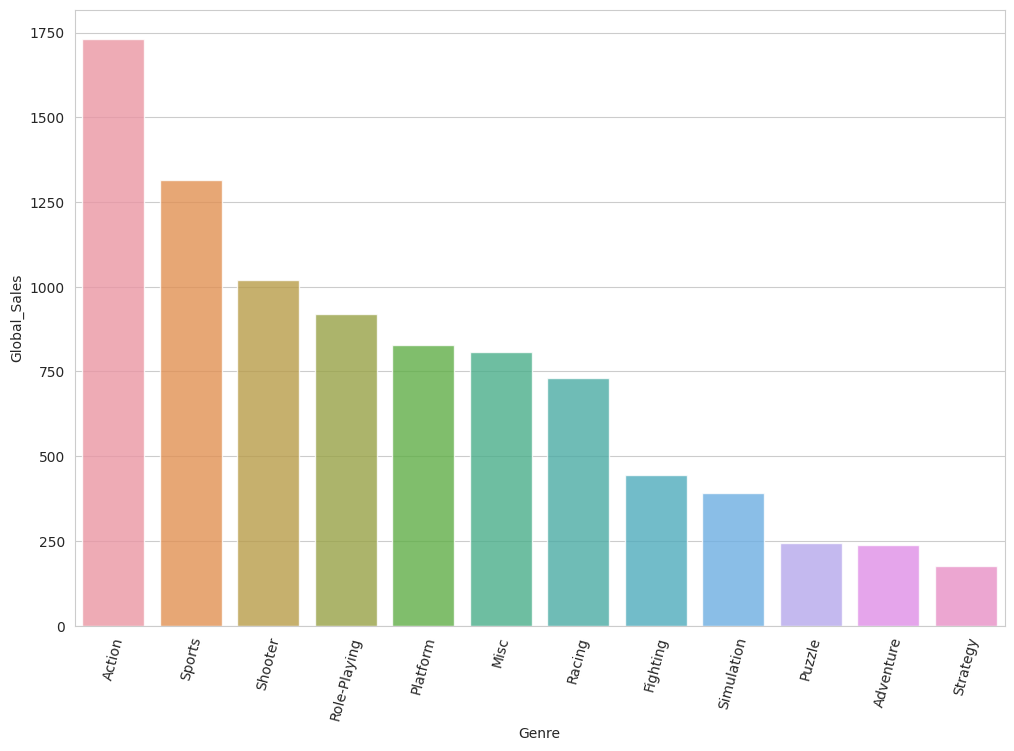

In [35]:
plt.figure(figsize = (12,8))
sns.barplot(x = "Genre", y = "Global_Sales", data = df_genre, alpha = 0.8)
plt.xticks(rotation = 75)

In [38]:
# Let's examine the platform
df_platform = df.groupby(by = ["Platform"])["Global_Sales"].sum()
df_platform = df_platform.reset_index()
# Convert it into DataFrame by saying reset_index
df_platform = df_platform.sort_values(by = ["Global_Sales"], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

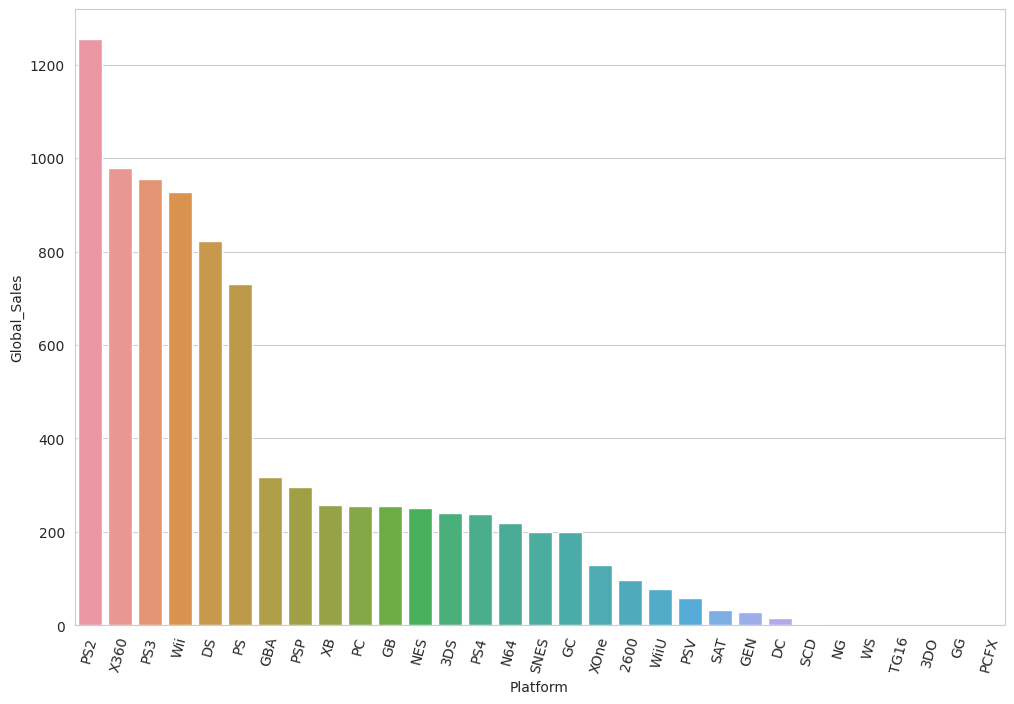

In [39]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Platform', y = 'Global_Sales', data = df_platform)
plt.xticks(rotation = 75)
# Most games for ps2 are sold

In [43]:
# Let's take a look at the individual game with the highest selling price globally.
top_game_sale = df.head(20) # created this dataframe using the first 20 rows in the dataset
top_game_sale = top_game_sale[["Name","Year","Genre","Global_Sales"]]
top_game_sale = top_game_sale.sort_values(by=["Global_Sales"],ascending=False)


In [56]:
name = top_game_sale["Name"]
year = top_game_sale["Year"]
y = np.arange(0,20)


Text(0.5, 0, 'Year')

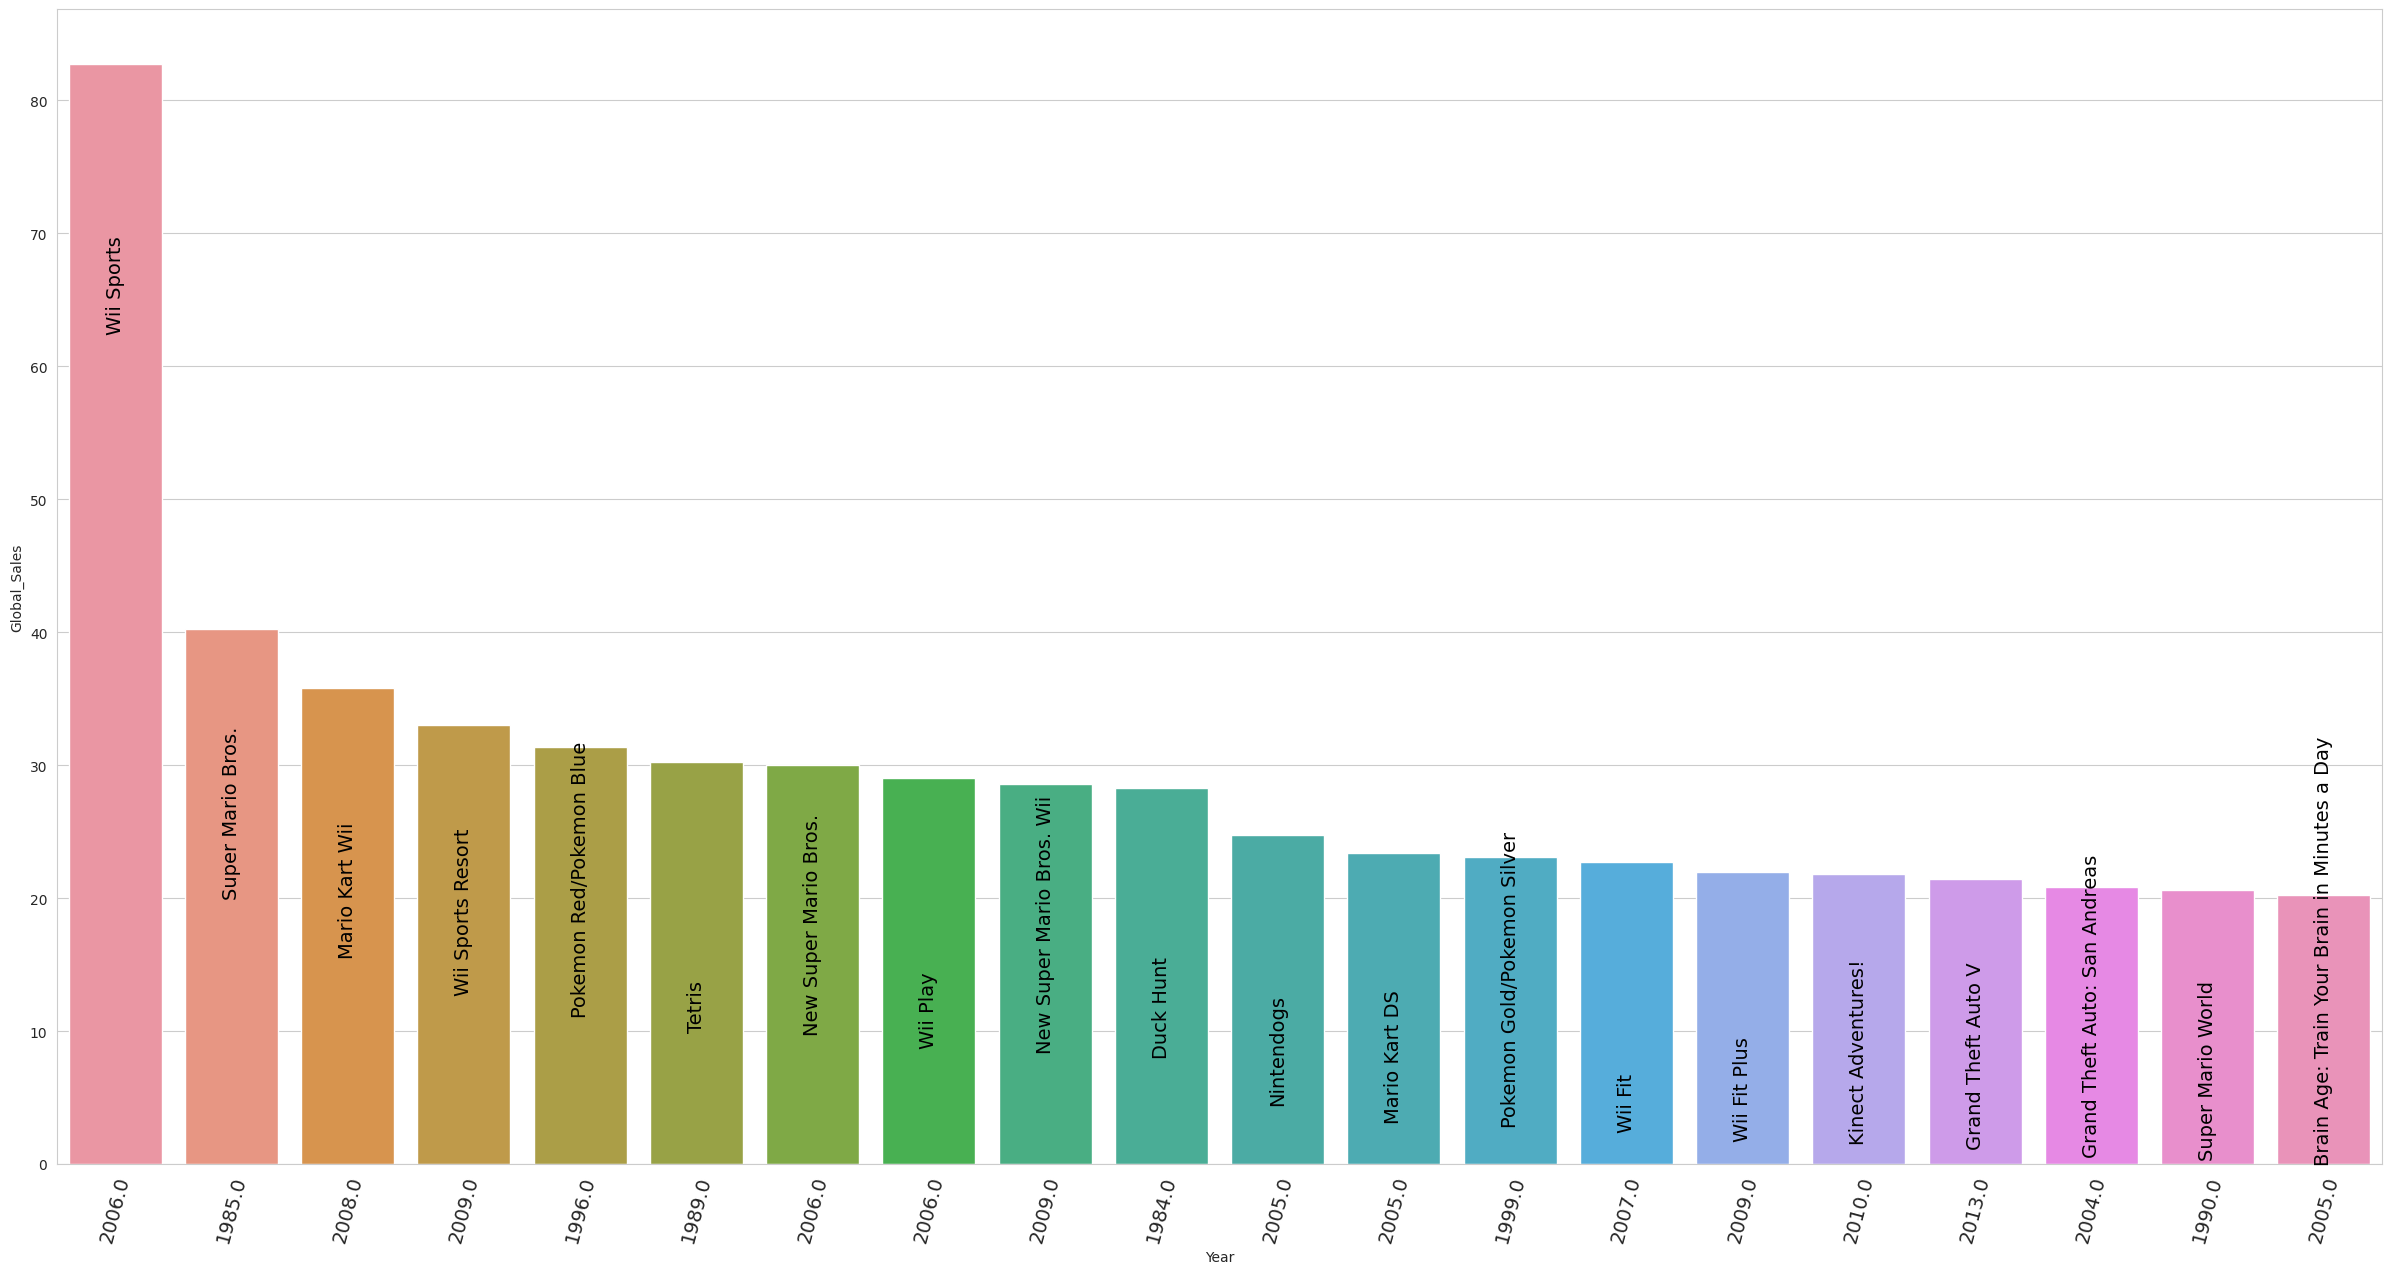

In [59]:
plt.figure(figsize = (30,15))
graph = sns.barplot(x = 'Name', y = 'Global_Sales', data = top_game_sale )
index = 0
for value in top_game_sale["Global_Sales"]:
  graph.text(index, value-20, name[index], color = 'Black', size = 14, rotation = 90, ha = 'center')
  index += 1
plt.xticks(y, year, fontsize = 14, rotation = 75)
plt.xlabel('Year')

In [60]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
# Let's compare sales by types
comp_genre = df[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
comp_map = comp_genre.groupby(by = ['Genre']).sum()
comp_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Adventure,105.46,63.74,51.10,16.70
Fighting,221.99,100.17,86.71,36.22
Misc,410.02,215.89,106.95,75.29
Platform,446.26,200.76,130.66,51.28
Puzzle,123.78,50.78,57.31,12.55
Racing,359.09,237.25,56.68,77.08
Role-Playing,325.89,186.77,348.64,59.17
Shooter,575.16,305.57,37.67,100.27


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Action'),
  Text(0, 1.5, 'Adventure'),
  Text(0, 2.5, 'Fighting'),
  Text(0, 3.5, 'Misc'),
  Text(0, 4.5, 'Platform'),
  Text(0, 5.5, 'Puzzle'),
  Text(0, 6.5, 'Racing'),
  Text(0, 7.5, 'Role-Playing'),
  Text(0, 8.5, 'Shooter'),
  Text(0, 9.5, 'Simulation'),
  Text(0, 10.5, 'Sports'),
  Text(0, 11.5, 'Strategy')])

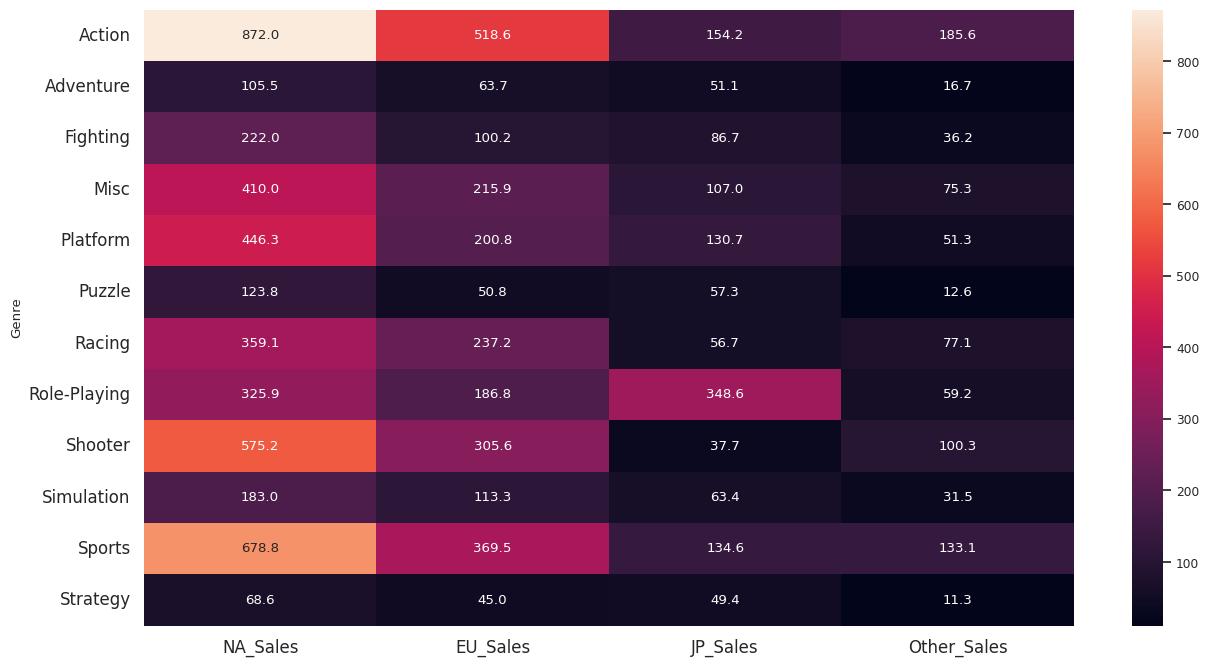

In [18]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.8)
sns.heatmap(comp_map, annot = True, fmt = ".1f")
# annot=True means it's in text
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


In [19]:
# Let's create a DataFrame and extract data.
comp_table = comp_map.reset_index() #We created df by resetting the indexes
comp_table = pd.melt(
    comp_table,
    id_vars = ['Genre'],
    value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    var_name = 'Sale_Area',
    value_name = 'Sale_Price'
)
# We created 2 different columns, Sale_Area and Sale_price
# we have edited with melt
# we took 4 variables and combined them under sale_area
comp_table.head()
#we have accessed directly in the table in which region it is sold the most

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_Price'>

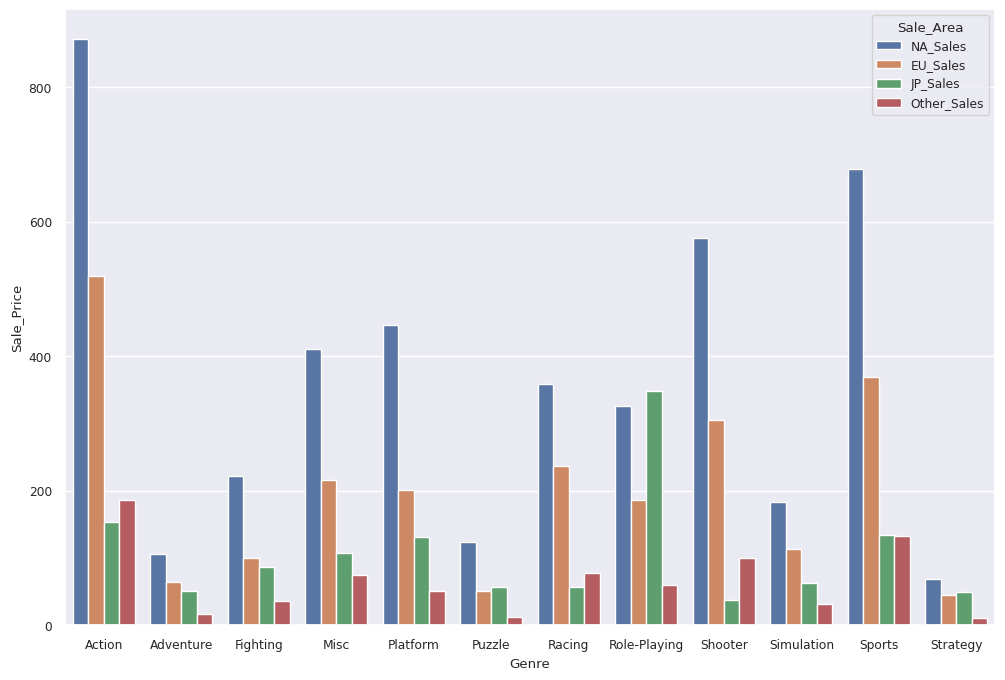

In [21]:
# Let's visualize this
plt.figure(figsize = (12,8))
sns.barplot(x = 'Genre', y = 'Sale_Price', data = comp_table, hue = 'Sale_Area')
# hue : this parameter shows how we will make the colorization variety

In [22]:
# Let's compare by platforms now
# there is a platform in the first place, be careful, we pull the data accordingly
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [29]:
comp_platform = comp_platform.groupby(by = ['Platform']).sum().reset_index()


In [30]:
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.04,57.95,92.32,12.51
3,DC,5.43,1.69,8.56,0.27
4,DS,390.44,194.65,175.57,60.51


In [31]:
comp_table = pd.melt(
    comp_platform,
    id_vars = ["Platform"],
    value_vars = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name = "Sale_Area",
    value_name = "Sale_Price"
)

comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

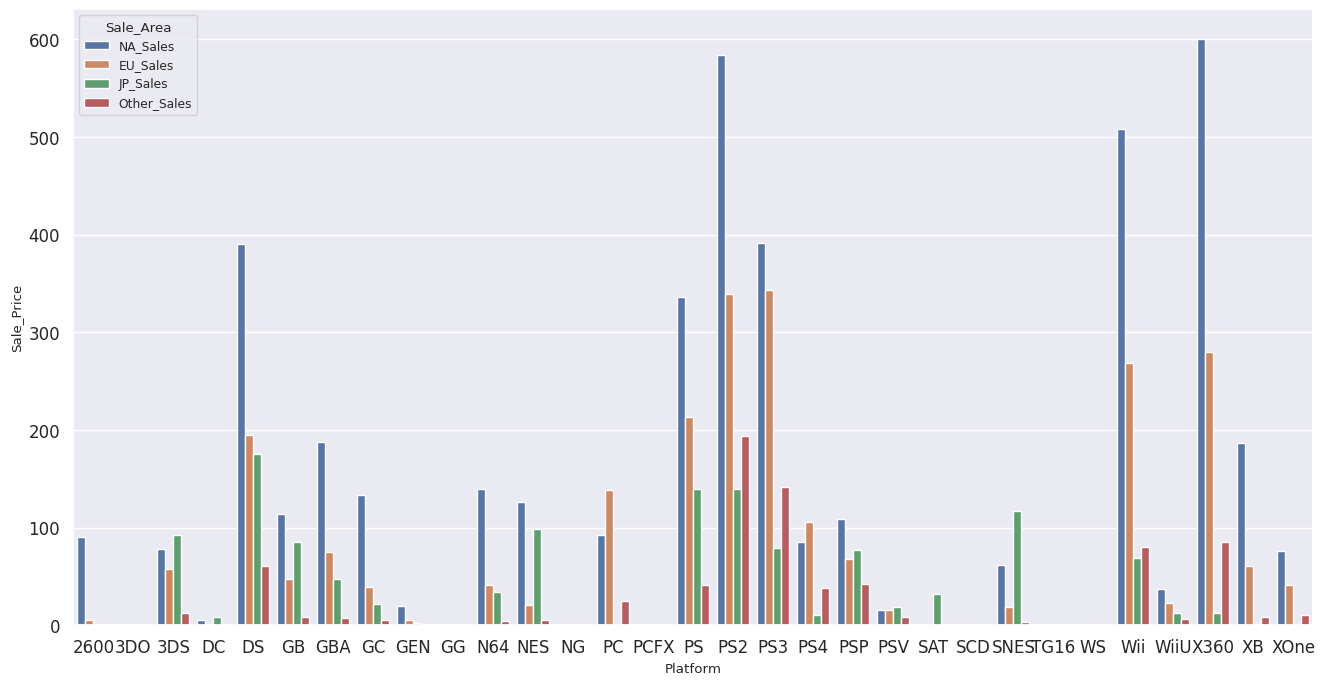

In [33]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'Platform', y = 'Sale_Price', data = comp_table, hue = 'Sale_Area')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [34]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
# Let's find the top 20 publishers now
top_publisher = df.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).head(20)
# Group the dataset by publisher column and selects the year column of each grouped publisher
# Select the number of publications with count, we sort with sort_values, and we find up to 20 with head(20)
# Counted how many games each publisher published by year by grouping by publisher column.
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher
# ranking by game line and the most streamed
# 20 we chose publishers

,Publisher,Year
0,Electronic Arts,1319
1,Activision,952
2,Ubisoft,904
3,Namco Bandai Games,888
4,Konami Digital Entertainment,815
5,THQ,712
6,Nintendo,686
7,Sony Computer Entertainment,677
8,Sega,622
9,Take-Two Interactive,400


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

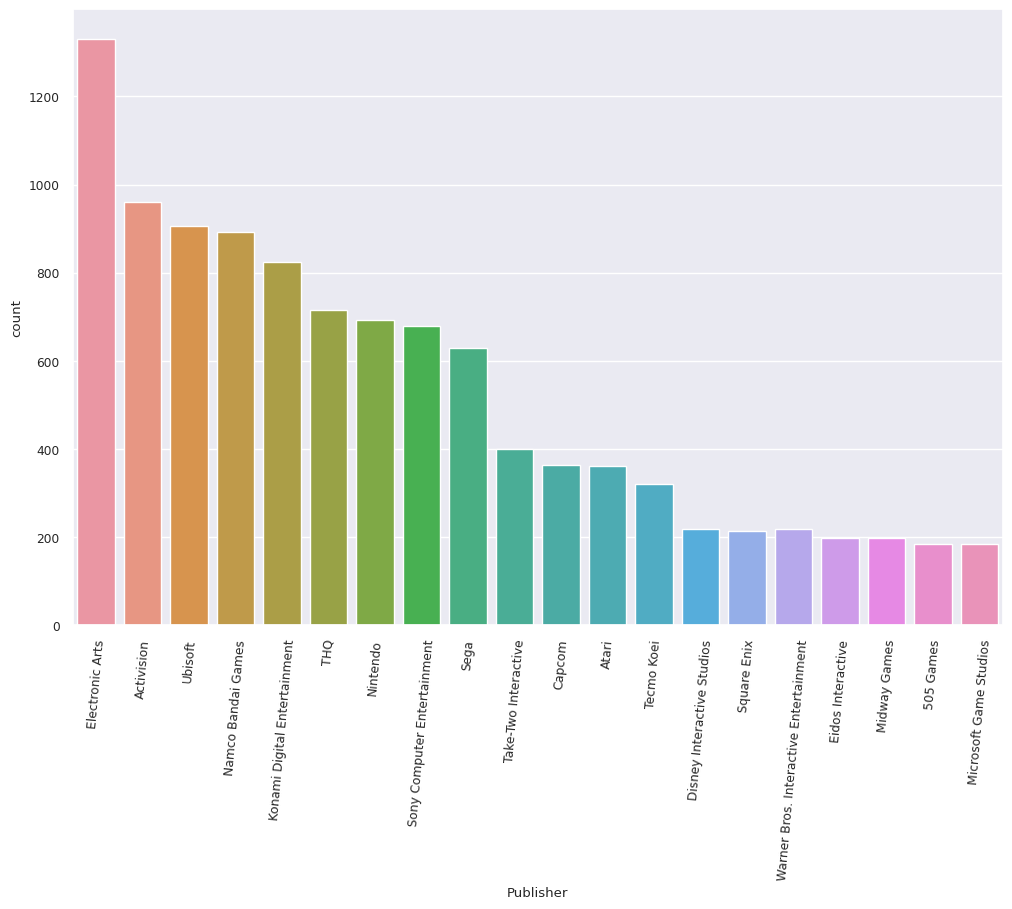

In [53]:
plt.figure(figsize= (12,8))
sns.countplot(x = 'Publisher', data = df, order = df.groupby(by = ["Publisher"])["Year"].count().sort_values(ascending = False).iloc[:20].index)
# Did the sorting with the order parameter
plt.xticks(rotation = 85)


In [21]:
#Let's find out who has the highest global sales among publishers.
sale_publisher = df[['Publisher', 'Global_Sales']]
sale_publisher = sale_publisher.groupby(by = ["Publisher"])["Global_Sales"].sum().sort_values(ascending=False).head()
sale_publisher = sale_publisher.reset_index()
sale_publisher

,Publisher,Global_Sales
0,Nintendo,1783.09
1,Electronic Arts,1098.07
2,Activision,723.79
3,Sony Computer Entertainment,600.94
4,Ubisoft,464.67


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000')])

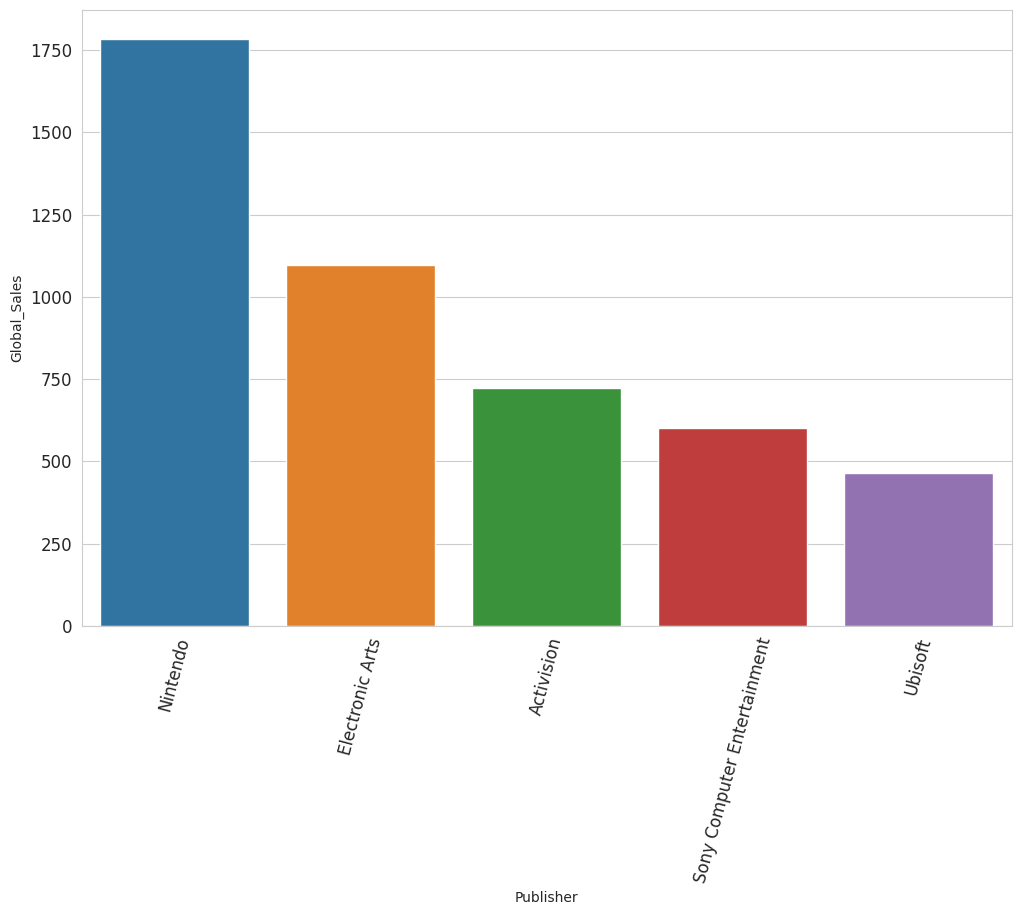

In [22]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Publisher', y = 'Global_Sales', data = sale_publisher)
plt.xticks(fontsize = 12, rotation = 75)
plt.yticks(fontsize = 12)

In [23]:
#Let's compare publishers
comp_publisher = df[['Publisher', 'NA_Sales', "EU_Sales", "JP_Sales", "Other_Sales","Global_Sales"]]
#First of all, there is the platform, we pull the data accordingly.
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
comp_publisher = comp_publisher.groupby(by = ['Publisher']).sum().sort_values(by = ['Global_Sales'], ascending = False).reset_index()
#Sorted by the global_sales column
comp_publisher = comp_publisher.head()
comp_publisher


,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,815.71,417.81,454.25,95.13,1783.09
1,Electronic Arts,591.43,364.36,13.95,128.14,1098.07
2,Activision,428.03,214.14,6.40,74.90,723.79
3,Sony Computer Entertainment,262.79,184.85,73.88,79.40,600.94
4,Ubisoft,249.31,158.94,7.26,48.96,464.67


In [25]:
comp_publisher = pd.melt(
    comp_publisher,
    id_vars=["Publisher"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name="Sale_Area",
    value_name="Sale_Price"
)

comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
5,Nintendo,EU_Sales,417.81
6,Electronic Arts,EU_Sales,364.36
7,Activision,EU_Sales,214.14
8,Sony Computer Entertainment,EU_Sales,184.85
9,Ubisoft,EU_Sales,158.94


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

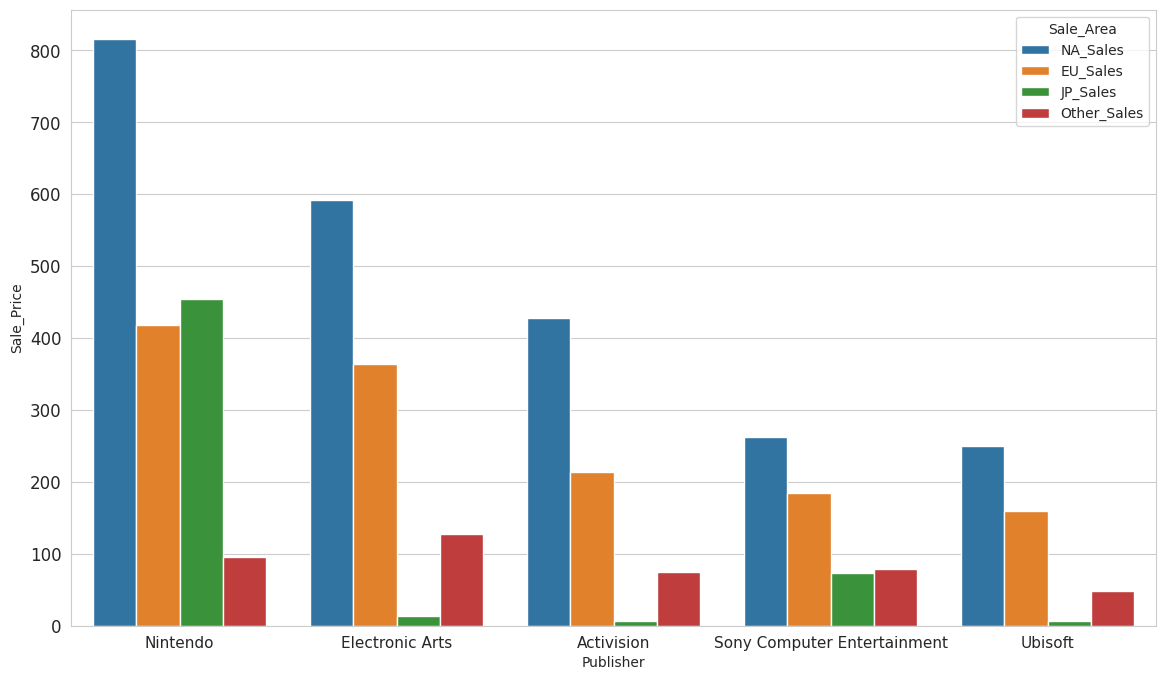

In [28]:
plt.figure(figsize = (14,8))
sns.barplot(x = 'Publisher', y = 'Sale_Price', data = comp_publisher, hue = 'Sale_Area')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 12)

In [44]:
# Let us see if we can find the top-ranked publisher by number of publishers for each year.
top_publisher = df[['Year','Publisher']]

# For this, let's group by year and type columns
top_publisher_df = top_publisher.groupby(by = ['Year', 'Publisher']).size().reset_index(name = 'count')

# grouped the year and publisher datasets, we will use the highest value to find
# checked the size with size, then we created a data frame called count
top_publisher_index = top_publisher_df.groupby(by=["Year"])["count"].transform(max)==top_publisher_df["count"] # marked the rows with max
top_publisher_count = top_publisher_df[top_publisher_index].reset_index(drop = True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=["Year","count"],keep="last").reset_index(drop = True)
top_publisher_count
# with this code, can get a data frame with the highest number of types of each year


,Year,Publisher,count
0,1980.0,Activision,5
1,1981.0,Atari,11
2,1982.0,Atari,14
3,1983.0,Nintendo,6
4,1984.0,Nintendo,9
5,1985.0,Nintendo,7
6,1986.0,Nintendo,6
7,1987.0,Nintendo,4
8,1988.0,Nintendo,6
9,1989.0,Nintendo,9


In [46]:
publisher = top_publisher_count["Publisher"]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

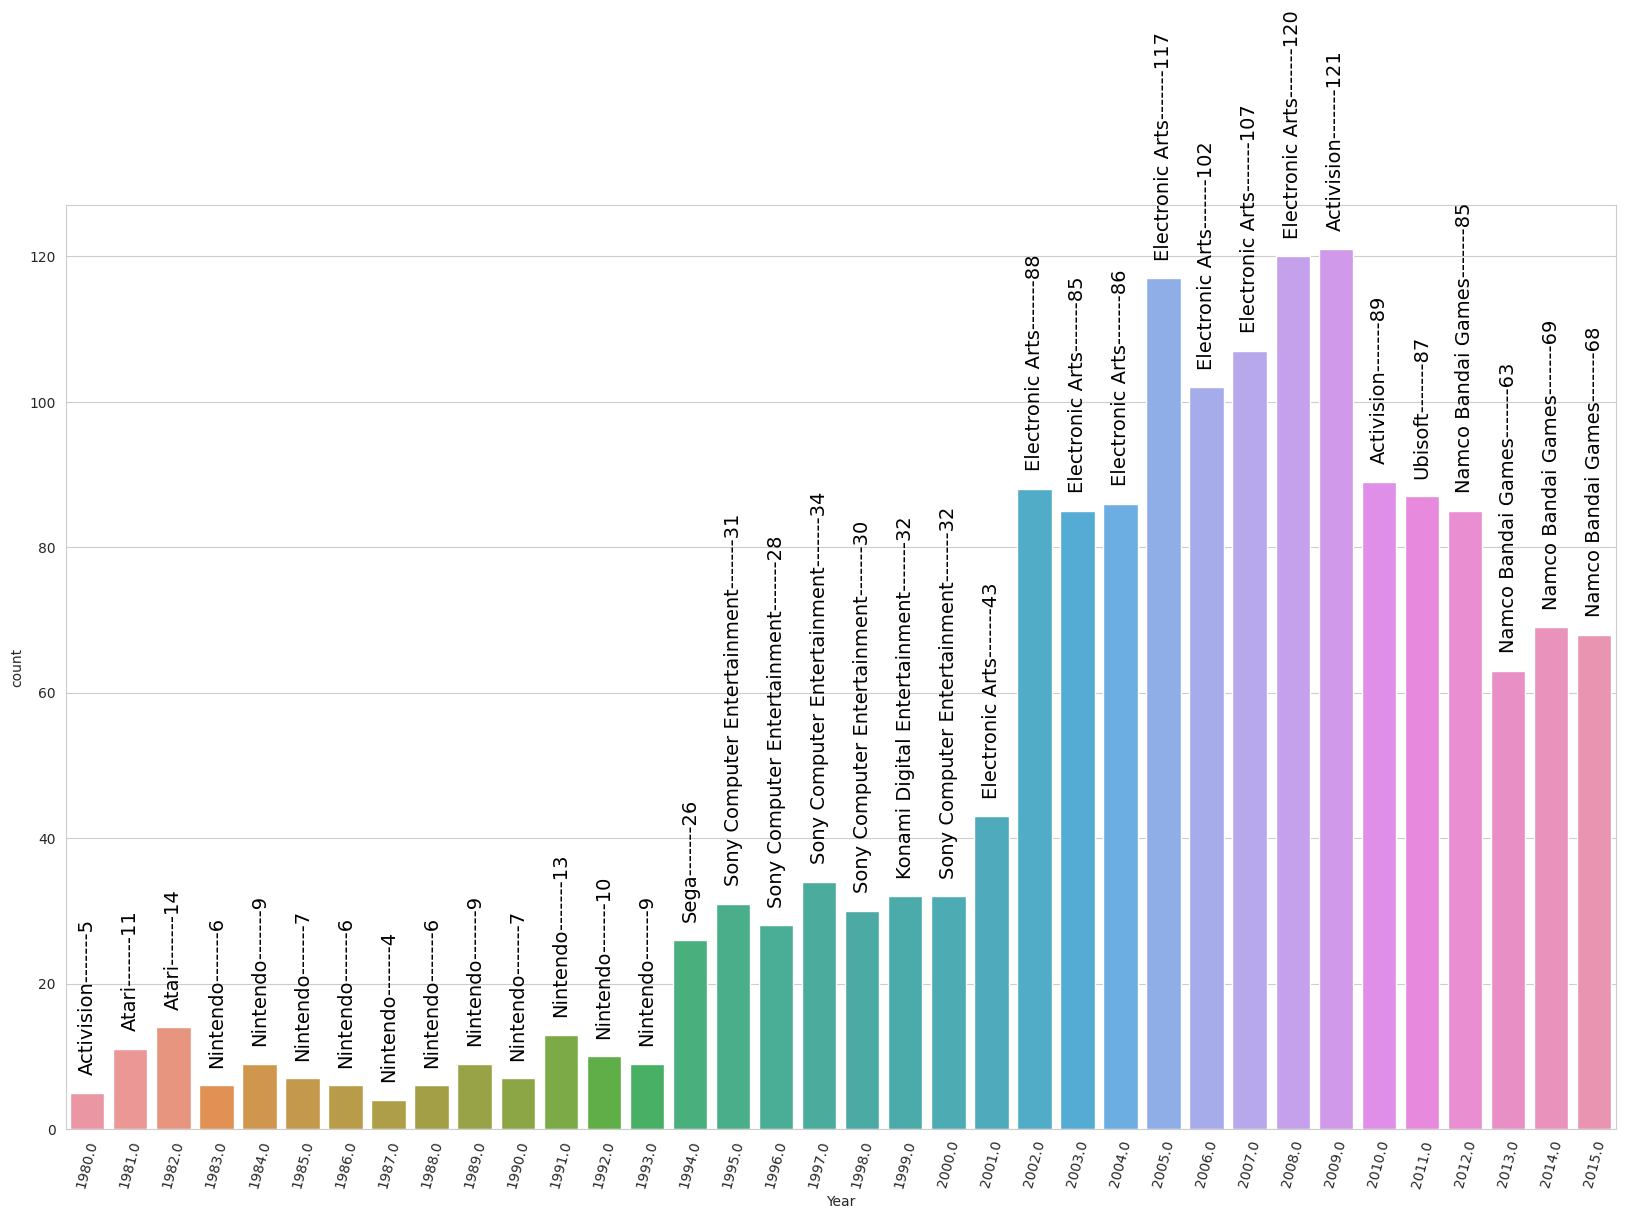

In [56]:
plt.figure(figsize = (20, 12))
graph = sns.barplot(x = 'Year', y = 'count', data = top_publisher_count)
index = 0

for value in top_publisher_count['count']:
  graph.text(index, value +3, str(publisher[index]+"-------"+str(value)), color = 'Black', size = 14, rotation = 90, ha = 'center')
  index += 1
plt.xticks(rotation = 75)

Other graph that can be plotted with this dataset.

In [39]:
#To know the number of counts in the Platform
top_platform = df['Platform'].value_counts().head(15)
top_platform

DS      2162
PS2     2161
Wii     1325
PS3     1297
X360    1257
PSP     1213
PS      1196
PC       922
XB       824
GBA      822
GC       556
3DS      474
PSV      351
N64      319
SNES     239
Name: Platform, dtype: int64

Text(0, 0.5, 'Number of Respondents')

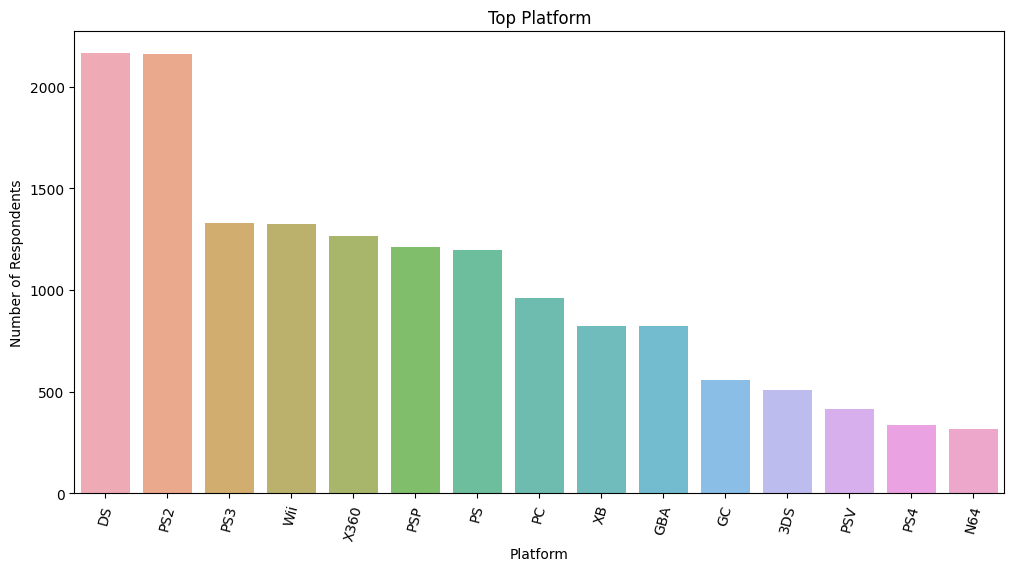

In [35]:
#Plot a bar chart
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top Platform')
sns.barplot(x = top_platform.index, y= top_platform, alpha = 0.8)
plt.xlabel('Platform')
plt.ylabel('Number of Respondents')


(array([3.490e+02, 4.820e+02, 8.290e+02, 7.750e+02, 7.630e+02, 9.410e+02,
        1.008e+03, 1.202e+03, 1.428e+03, 1.431e+03, 1.259e+03, 1.139e+03,
        6.570e+02, 5.460e+02, 5.820e+02, 6.140e+02, 3.440e+02, 3.000e+00,
        0.000e+00, 1.000e+00]),
 array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
        2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019., 2020.]),
 <BarContainer object of 20 artists>)

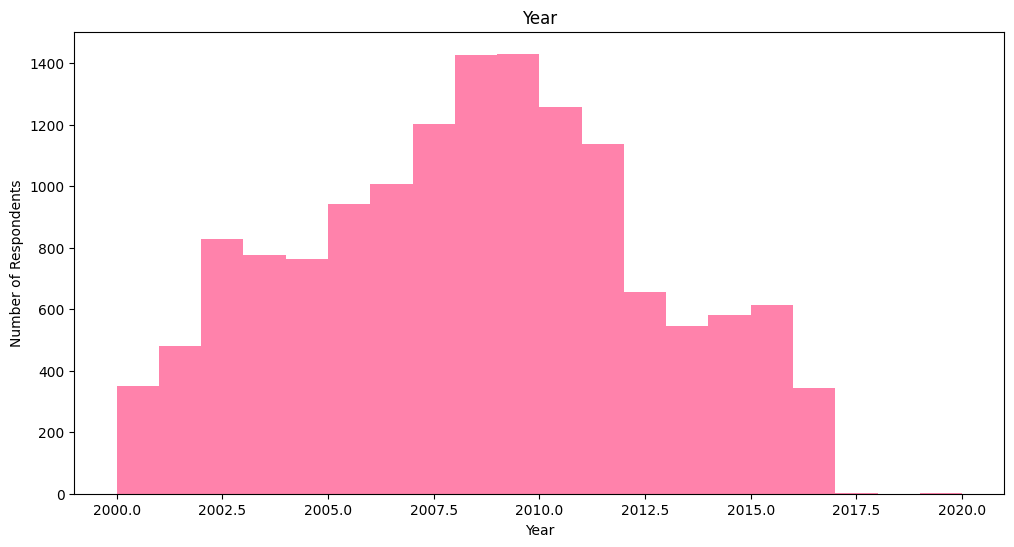

In [43]:
#Plot a histogram
plt.figure(figsize = (12,6))
plt.title('Year')
plt.xlabel('Year')
plt.ylabel('Number of Respondents')

plt.hist(df.Year, bins= np.arange(2000,2021,1), color = '#FF82AB')


In [4]:
#To know the number of counts in the Genre
genre_counts = df.Genre.value_counts()
genre_counts

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

([<matplotlib.patches.Wedge at 0x7d7f317e5630>,
 [Text(0.7646632089065525, 0.7907529177592291, 'Action'),
  Text(-0.3282767709908132, 1.0498734979166993, 'Sports'),
  Text(-0.9681977135367956, 0.5221045752549207, 'Misc'),
  Text(-1.092577410715371, -0.12757194673789246, 'Role-Playing'),
  Text(-0.8784615025010307, -0.6620463644063245, 'Shooter'),
  Text(-0.46216330009750367, -0.9982009236836965, 'Adventure'),
  Text(0.05080649393413264, -1.0988260554674343, 'Racing'),
  Text(0.4787662308011602, -0.9903448370362974, 'Platform'),
  Text(0.7752531855963262, -0.7803733069645248, 'Simulation'),
  Text(0.9836560065554045, -0.492362529816673, 'Fighting'),
  Text(1.0832603868878155, -0.19117252469866183, 'Strategy'),
  Text(1.0977215373769815, 0.07076317106176265, 'Puzzle')],
 [Text(0.4170890230399377, 0.43131977332321586, '20.0%'),
  Text(-0.17906005690407992, 0.5726582715909267, '14.1%'),
  Text(-0.528107843747343, 0.28478431377541125, '10.5%'),
  Text(-0.5959513149356569, -0.069584698220668

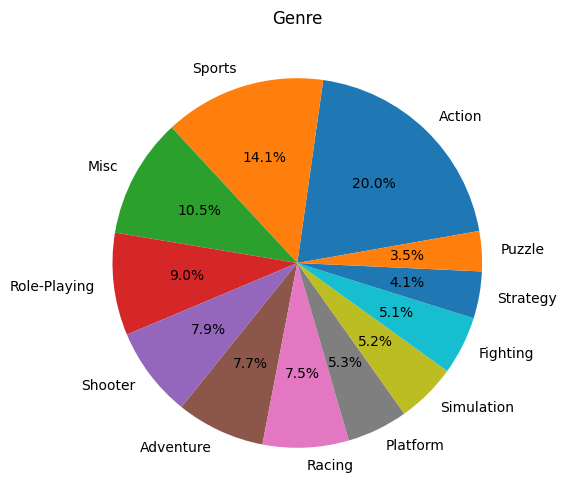

In [13]:
#Plot a pie chart
plt.figure(figsize=(12,6))
plt.title("Genre")
plt.pie(genre_counts, labels = genre_counts.index, autopct = '%1.1f%%', startangle = 10)

In [6]:
publisher = df.Publisher.copy()
publisher

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object

Text(0, 0.5, '')

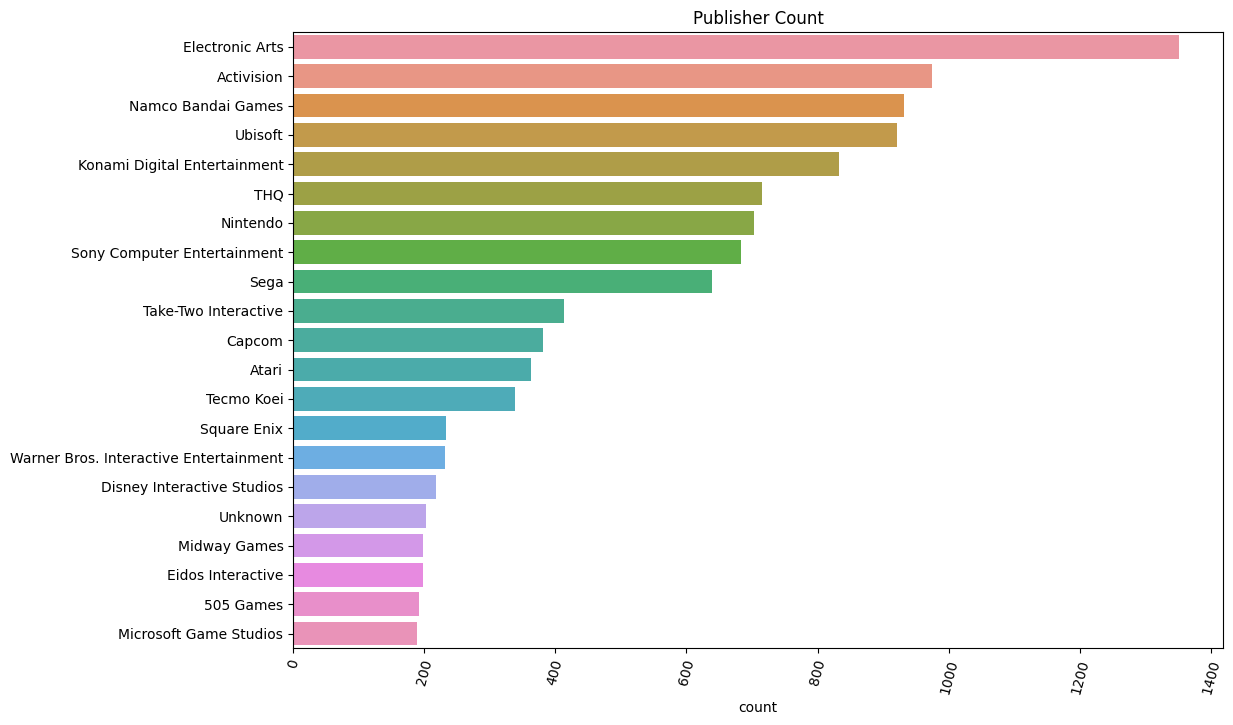

In [8]:
#To display the top 20 publishers in the dataset
plt.figure(figsize = (12,8))
sns.countplot(y = publisher, order=publisher.value_counts().iloc[:21].index)
plt.xticks(rotation = 75)
plt.title('Publisher Count')
plt.ylabel(None)

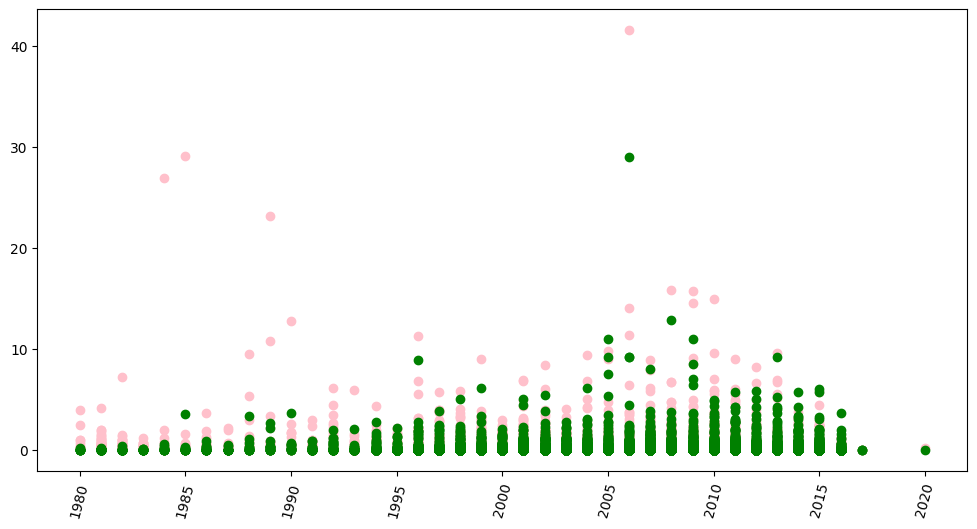

In [31]:
x = df.Year
y1 = df.NA_Sales
y2 = df.EU_Sales
plt.figure(figsize = (12,6))
plt.xticks(rotation=75)
plt.scatter(x,y1, color = 'pink')
plt.scatter(x,y2, color = 'green')

<Axes: xlabel='Platform'>

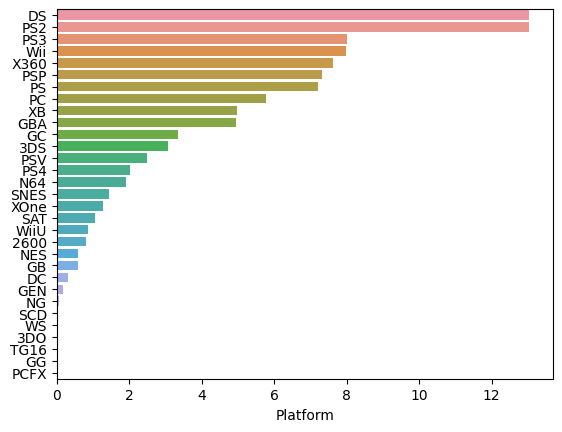

In [20]:
platform_percentage = df.Platform.value_counts() * 100 /df.Platform.count()

sns.barplot(x = platform_percentage, y = platform_percentage.index)